In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# getting my dataframes in order

In [2]:
bull_sequence='ARYRCCLTHSGSRCRRRRRRRCRRRRRRFGRRRRRRVCCRRYTVIRCRR'
salmon_sequence='MPRRRRSSSRPVRRRRRPRVSRRRRRRGGRRRR'
p1_sequence='ARYRCCRSQSRSRYYRQRQRSRRRRRRSCQTRRRAMRCCRPRYRPRCRRH'

In [29]:
#FUNCTION to distinguish arginine clustered arginines and single arginines
#protamine_sequence='MARYRCCRSRSRCRRRRRRCYRRRRRCCRRRRRRVCCRRYTVIRCRRR'
#look at example in above line. protamine_sequence is a single sequence. 
def count_arg_blocks(protamine_sequence):
    import numpy as np
    arg_length=[]
    i=0
    j=0
    k=1
    while j<=len(protamine_sequence)-2 and k<=len(protamine_sequence):
        if protamine_sequence[j]=='R' and protamine_sequence[j+1]=='R':
            count_arg=0
            i=j
            while protamine_sequence[i]=='R':
                count_arg=count_arg+1
                i=i+1
                if i>(len(protamine_sequence)-1):
                        break
            arg_length.extend([count_arg]*count_arg)
            j=i
        elif protamine_sequence[j]=='R' and protamine_sequence[j+1]!='R':
            arg_length.append(1)
            j=j+1
        elif protamine_sequence[j]=='-':
            arg_length.append(np.nan)
            j=j+1
        else:
            arg_length.append(0)
            j=j+1
        k=k+1
    if protamine_sequence[len(protamine_sequence)-1]=='R' and protamine_sequence[len(protamine_sequence)-2]!='R':
        arg_length.append(1)
    elif protamine_sequence[len(protamine_sequence)-1]=='-':
        arg_length.append(np.nan)
    elif protamine_sequence[len(protamine_sequence)-1]!='R':
        arg_length.append(0)
    return arg_length

In [30]:
#counting arginines. my protamines don't have lysines so i'm not counting them in this code
salmon_arginines=[]
p1_arginines=[]
bull_arginines=[]
for res in salmon_sequence:
    if res=='R':
        salmon_arginines.append(1)
for res in bull_sequence:
    if res=='R':
        bull_arginines.append(1)
for res in p1_sequence:
    if res=='R':
        p1_arginines.append(1)

In [31]:
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for salmon
salmon_arg_dist = pd.read_csv('salmon_arg_lys_dist.csv')
salmon_arg_dist=salmon_arg_dist[salmon_arg_dist.sim!=2]
salmon_arg_dist=salmon_arg_dist[salmon_arg_dist.sim!=11]
#this step is because some salmon simulations have more than 200ns
temp_df=salmon_arg_dist.copy()
for sim in temp_df.sim.unique():
    n=temp_df[temp_df.sim==sim].frames.max()-100000
    if n>0:
        temp_df.drop(temp_df[temp_df.sim==sim].tail(n).index,inplace=True)
salmon_arg_dist=temp_df.copy()
del temp_df
#this step is taking last 40000 frames i.e. equilibrated portion
blank_df = pd.DataFrame()
for sim in salmon_arg_dist.sim.unique():
    temp_df = salmon_arg_dist[salmon_arg_dist.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
salmon_arg_dist = blank_df.copy()
del blank_df
del temp_df


In [32]:
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for human p1
p1_arg_dist=pd.read_csv('p1_arg_lys_dist.csv')
p1_arg_dist=p1_arg_dist[p1_arg_dist.sim!=15]
p1_arg_dist=p1_arg_dist[p1_arg_dist.sim!=13]
blank_df = pd.DataFrame()
for sim in p1_arg_dist.sim.unique():
    temp_df = p1_arg_dist[p1_arg_dist.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
p1_arg_dist = blank_df.copy()
del blank_df
del temp_df


In [33]:
#need to remove frames and simulations that are not necessary
#only show equilibrated part
#this is for bull
bull_arg_dist=pd.read_csv('bull_arg_lys_dist.csv')
bull_arg_dist=bull_arg_dist[bull_arg_dist.sim!=14]
bull_arg_dist=bull_arg_dist[bull_arg_dist.sim!=15]
blank_df = pd.DataFrame()
for sim in bull_arg_dist.sim.unique():
    temp_df = bull_arg_dist[bull_arg_dist.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
bull_arg_dist = blank_df.copy()
del blank_df
del temp_df


In [34]:
k=0
test_salmon=salmon_arg_dist.copy()
salmon_final_first_res=int(test_salmon.columns[len(test_salmon.columns)-1].split(':')[1])
salmon_final_second_res=int(test_salmon.columns[len(test_salmon.columns)-1].split(':')[2])
#test_salmon.columns.get_loc(test_salmon.columns[test_salmon.columns.str.startswith(':4')][0])
for column in salmon_arg_dist.columns:
    if column!='sim' and column!='frames':
        first=int(column.split(':')[1])
        second=int(column.split(':')[2])
        find_col_index=':'+str(second)+':'
        if first<salmon_final_first_res and second<salmon_final_second_res:
            target_col_index=test_salmon.columns.get_loc(test_salmon.columns[test_salmon.columns.str.startswith(find_col_index)][0])
            test_salmon.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_salmon[column]) 
        elif first<salmon_final_first_res and second==salmon_final_second_res and k==0:
            test_salmon.insert(len(test_salmon.columns),
                               ':'+str(second)+':'+str(first),
                               test_salmon[column])
            k+=1
        elif first<salmon_final_first_res and second==salmon_final_second_res and k>0:
            target_col_index=test_salmon.columns.get_loc(test_salmon.columns[test_salmon.columns.str.startswith(find_col_index)][0])
            test_salmon.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_salmon[column])
        elif first==salmon_final_first_res and second==salmon_final_second_res:
            target_col_index=test_salmon.columns.get_loc(test_salmon.columns[test_salmon.columns.str.startswith(find_col_index)][0])
            test_salmon.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_salmon[column])
salmon_arg_dist=test_salmon.copy()
del test_salmon
            

            

In [35]:
k=0
test_bull=bull_arg_dist.copy()
bull_final_first_res=int(test_bull.columns[len(test_bull.columns)-1].split(':')[1])
bull_final_second_res=int(test_bull.columns[len(test_bull.columns)-1].split(':')[2])
#test_bull.columns.get_loc(test_bull.columns[test_bull.columns.str.startswith(':4')][0])
for column in bull_arg_dist.columns:
    if column!='sim' and column!='frames':
        first=int(column.split(':')[1])
        second=int(column.split(':')[2])
        find_col_index=':'+str(second)+':'
        if first<bull_final_first_res and second<bull_final_second_res:
            target_col_index=test_bull.columns.get_loc(test_bull.columns[test_bull.columns.str.startswith(find_col_index)][0])
            test_bull.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_bull[column]) 
        elif first<bull_final_first_res and second==bull_final_second_res and k==0:
            test_bull.insert(len(test_bull.columns),
                               ':'+str(second)+':'+str(first),
                               test_bull[column])
            k+=1
        elif first<bull_final_first_res and second==bull_final_second_res and k>0:
            target_col_index=test_bull.columns.get_loc(test_bull.columns[test_bull.columns.str.startswith(find_col_index)][0])
            test_bull.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_bull[column])
        elif first==bull_final_first_res and second==bull_final_second_res:
            target_col_index=test_bull.columns.get_loc(test_bull.columns[test_bull.columns.str.startswith(find_col_index)][0])
            test_bull.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_bull[column])
bull_arg_dist=test_bull.copy()
del test_bull
            

            

In [36]:
k=0
test_p1=p1_arg_dist.copy()
p1_final_first_res=int(test_p1.columns[len(test_p1.columns)-1].split(':')[1])
p1_final_second_res=int(test_p1.columns[len(test_p1.columns)-1].split(':')[2])
#test_p1.columns.get_loc(test_p1.columns[test_p1.columns.str.startswith(':4')][0])
for column in p1_arg_dist.columns:
    if column!='sim' and column!='frames':
        first=int(column.split(':')[1])
        second=int(column.split(':')[2])
        find_col_index=':'+str(second)+':'
        if first<p1_final_first_res and second<p1_final_second_res:
            target_col_index=test_p1.columns.get_loc(test_p1.columns[test_p1.columns.str.startswith(find_col_index)][0])
            test_p1.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_p1[column]) 
        elif first<p1_final_first_res and second==p1_final_second_res and k==0:
            test_p1.insert(len(test_p1.columns),
                               ':'+str(second)+':'+str(first),
                               test_p1[column])
            k+=1
        elif first<p1_final_first_res and second==p1_final_second_res and k>0:
            target_col_index=test_p1.columns.get_loc(test_p1.columns[test_p1.columns.str.startswith(find_col_index)][0])
            test_p1.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_p1[column])
        elif first==p1_final_first_res and second==p1_final_second_res:
            target_col_index=test_p1.columns.get_loc(test_p1.columns[test_p1.columns.str.startswith(find_col_index)][0])
            test_p1.insert(target_col_index,
                               ':'+str(second)+':'+str(first),
                               test_p1[column])
p1_arg_dist=test_p1.copy()
del test_p1
            

            

In [37]:
#this is how the salmon dataframe looks
salmon_arg_dist

,frames,sim,:3:4,:3:5,:3:6,:3:10,:3:13,:3:14,:3:15,:3:16,...,:33:17,:33:16,:33:15,:33:14,:33:13,:33:10,:33:6,:33:5,:33:4,:33:3
70000,70001,1,12.641150,5.773895,11.407286,16.469305,24.304745,21.746062,13.982590,17.491650,...,19.961162,8.994631,18.476501,6.778015,13.482612,19.435584,31.320561,20.430930,28.705037,22.811286
70001,70002,1,12.538698,7.505746,11.862073,17.980959,24.895986,22.214744,15.049841,17.148199,...,20.225129,9.400723,18.466562,7.246187,12.519647,17.383564,30.374238,18.878167,28.148043,22.765277
70002,70003,1,11.777778,6.258039,11.194755,16.842937,24.698966,20.813821,13.404656,16.484120,...,19.760447,9.344592,18.394189,7.121505,14.486214,17.282835,29.399292,17.664738,26.970070,21.456432
70003,70004,1,11.816744,5.892262,11.244084,14.680589,23.416328,20.280510,13.380053,16.219435,...,20.620853,9.099584,18.777044,7.099753,13.960936,17.448652,29.774590,17.031959,25.756361,20.789158
70004,70005,1,12.068774,6.232624,11.288745,15.788349,23.297470,20.235331,13.137731,15.969841,...,20.607017,9.572971,18.892536,7.706470,14.824461,18.132580,29.815372,17.509768,26.989731,20.836624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532516,99996,15,11.205579,13.782460,15.700090,27.357729,36.433599,33.757865,22.991825,32.284199,...,29.144397,31.222272,35.324299,33.713909,33.385319,32.570178,44.279326,47.994087,41.631536,51.469273
1532517,99997,15,11.810775,13.007532,15.846220,28.203474,36.745161,33.148270,24.251301,33.069415,...,28.151325,31.644044,35.099316,33.446112,33.639715,32.192128,44.351181,47.715414,41.313741,52.270012
1532518,99998,15,11.990489,12.981132,16.084284,27.541644,35.760067,32.652094,23.630392,32.633963,...,30.382911,33.445348,37.695582,34.912938,34.732290,34.056527,45.818706,48.896328,42.033972,53.257579
1532519,99999,15,11.088295,12.687482,15.180851,26.954505,34.933394,31.706678,22.088229,32.458828,...,29.455347,32.641104,37.064067,34.944155,33.943204,34.820590,45.718143,48.838709,42.085089,51.968532


In [38]:
#this is how the bull dataframe looks
bull_arg_dist

,frames,sim,:2:4,:2:13,:2:15,:2:16,:2:17,:2:18,:2:19,:2:20,...,:49:21,:49:20,:49:19,:49:18,:49:17,:49:16,:49:15,:49:13,:49:4,:49:2
70000,70001,1,12.990899,17.215746,23.937039,27.061550,34.355134,26.519239,24.262227,33.529571,...,41.027127,44.628872,51.400525,51.028745,49.987672,53.890951,57.347150,56.011399,67.225043,71.655625
70001,70002,1,13.281191,17.571399,24.165340,27.149627,34.149876,27.100694,24.230006,31.797733,...,40.153857,45.130450,50.615615,50.019926,49.517061,52.959044,56.976612,55.028173,66.293098,70.348047
70002,70003,1,13.102486,16.329084,23.772376,26.516774,32.730351,27.157480,23.938539,31.770891,...,40.854713,44.752293,50.504086,50.569853,50.381637,52.700907,57.219677,56.695157,67.264562,70.671853
70003,70004,1,11.078239,15.625350,23.889562,24.190767,31.523553,27.050710,22.345574,31.613239,...,39.723895,43.914065,50.671112,49.216372,50.858801,51.789980,56.659356,56.696539,67.436219,69.971418
70004,70005,1,11.146868,16.647375,25.541044,25.646075,31.808553,27.445802,22.828986,30.702581,...,39.387189,45.115168,50.745850,49.705946,50.506333,51.030615,56.173470,56.423939,67.581594,69.777006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,99996,13,10.124861,24.679160,22.300778,29.203440,27.758934,30.963737,31.956467,37.598194,...,29.663368,34.532933,33.434061,42.305234,43.197412,37.766656,43.218017,44.010237,60.894789,64.842126
1299996,99997,13,9.898222,24.132565,22.002060,28.438200,27.964707,30.253900,30.970628,36.501713,...,28.301435,35.113421,33.369962,41.835919,43.097263,37.837818,42.566990,43.513421,60.419440,63.764197
1299997,99998,13,10.809684,23.855174,20.817492,27.199869,27.844355,30.240617,30.685801,37.187010,...,28.104967,34.085178,32.620912,41.071290,42.238442,37.677182,42.883007,42.836200,60.488206,62.412721
1299998,99999,13,11.459896,22.340262,19.837317,26.766785,27.971235,28.412110,30.625965,35.865087,...,28.082853,34.839996,31.919505,41.788954,41.369223,36.509421,43.302428,43.210099,59.369738,61.938536


In [39]:
#this is how the human P1 dataframe looks
p1_arg_dist

,frames,sim,:2:4,:2:7,:2:11,:2:13,:2:16,:2:18,:2:20,:2:22,...,:49:23,:49:22,:49:20,:49:18,:49:16,:49:13,:49:11,:49:7,:49:4,:49:2
70000,70001,1,5.207026,13.054826,15.420253,18.338928,21.132111,26.463711,34.547064,38.576725,...,56.685534,47.455199,45.785428,56.888363,56.049479,58.187429,68.214524,70.996797,76.075680,76.093237
70001,70002,1,5.003197,12.170230,15.395186,17.287846,19.678892,26.321280,34.224521,38.741741,...,56.497553,48.036509,45.509684,55.849862,56.596629,57.916659,67.873842,71.067661,75.798103,74.964704
70002,70003,1,4.369427,12.231710,15.313195,17.783347,19.246553,26.041413,34.304559,37.779071,...,57.002752,49.064671,44.708223,56.342173,57.356508,57.785302,68.064070,71.175382,76.592509,75.499671
70003,70004,1,4.542985,12.539565,15.994112,18.753290,20.468422,26.688798,35.128839,37.677217,...,57.008464,49.277277,44.106979,56.388086,56.343286,56.956862,68.046445,71.292764,76.046164,75.496647
70004,70005,1,4.596833,11.003566,15.271507,17.485223,19.474535,26.567254,34.067414,37.412536,...,57.362857,48.343324,44.467774,54.973082,56.046125,56.848680,67.812244,71.159303,75.346911,74.013658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399995,99996,14,12.798203,9.896905,23.083497,23.730489,23.770881,27.643297,27.321106,30.766736,...,43.126843,45.924075,48.612422,49.485471,51.246684,57.697901,58.884974,71.299147,77.766468,73.879204
1399996,99997,14,12.824982,10.454773,22.219710,23.028558,23.537918,27.184842,28.101097,30.231218,...,42.228180,46.152298,47.937786,49.973174,51.901387,57.532686,58.964082,70.984860,76.924815,73.952819
1399997,99998,14,13.235149,9.918198,22.122403,23.319833,23.245954,26.489989,27.159310,29.672294,...,42.819542,46.353319,48.253458,50.102400,51.732958,56.962844,59.297498,70.357653,76.826621,73.518242
1399998,99999,14,13.564598,9.780410,22.176099,23.550504,24.230585,28.071721,28.448686,31.143487,...,41.164524,44.852602,46.660289,48.456012,50.121579,56.356222,59.043313,69.982911,76.222546,73.487440


# minimum pairs identified based on distance not sequence

In [40]:
#breaking up the main dataframe into smaller dataframes
#for example, the first small dataframe has columns :3:4, :3:5 i.e. all residue pairs beginning with 3
#for example, the second small dataframe has columns :4:3,:4:5, :4:6 i.e. all residue pairs beginning with 4
#and so on

#then i get minimum value in each row for each small dataframe.
#i collect those minimum values in the form of a numpy array. there are three numpy arrays for 3 protamines

#below code for salmon
j=0
first_init=[]
salmon_dataframes=[]
for residue_pair in salmon_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        salmon_dataframes.append(salmon_arg_dist[residue_pair])
    elif j>0:
        if first_init[j]==first_init[j-1]:
                salmon_dataframes[len(salmon_dataframes)-1]=pd.concat([salmon_dataframes[len(salmon_dataframes)-1],
                                                                       salmon_arg_dist[residue_pair]],
                                                                      axis=1)
        elif first_init[j]>first_init[j-1]:
            salmon_dataframes.append(salmon_arg_dist[residue_pair])
            
        else:
            print('error!')
            
    j=j+1
k=0
#get row-by-row minimum values for the small dataframes
for df in salmon_dataframes:
    if k==0:
        salmon_minimum_values=df.min(axis=1).values
    elif k>0:
        salmon_minimum_values=np.concatenate([salmon_minimum_values,df.min(axis=1).values])
    k+=1

#below code for bull
j=0
first_init=[]
bull_dataframes=[]
for residue_pair in bull_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        bull_dataframes.append(bull_arg_dist[residue_pair])
    elif j>0:
        if first_init[j]==first_init[j-1]:
                bull_dataframes[len(bull_dataframes)-1]=pd.concat([bull_dataframes[len(bull_dataframes)-1],
                                                                       bull_arg_dist[residue_pair]],
                                                                      axis=1)
        elif first_init[j]>first_init[j-1]:
            bull_dataframes.append(bull_arg_dist[residue_pair])
            
        else:
            print('error!')
            
    j=j+1
k=0
#get row-by-row minimum values for the small dataframes
for df in bull_dataframes:
    if k==0:
        bull_minimum_values=df.min(axis=1).values
    elif k>0:
        bull_minimum_values=np.concatenate([bull_minimum_values,df.min(axis=1).values])
    k+=1

#below code for p1
j=0
first_init=[]
p1_dataframes=[]
for residue_pair in p1_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        p1_dataframes.append(p1_arg_dist[residue_pair])
    elif j>0:
        if first_init[j]==first_init[j-1]:
                p1_dataframes[len(p1_dataframes)-1]=pd.concat([p1_dataframes[len(p1_dataframes)-1],
                                                                       p1_arg_dist[residue_pair]],
                                                                      axis=1)
        elif first_init[j]>first_init[j-1]:
            p1_dataframes.append(p1_arg_dist[residue_pair])
            
        else:
            print('error!')
            
    j=j+1
k=0
#get row-by-row minimum values for the small dataframes
for df in p1_dataframes:
    if k==0:
        p1_minimum_values=df.min(axis=1).values
    elif k>0:
        p1_minimum_values=np.concatenate([p1_minimum_values,df.min(axis=1).values])
    k+=1

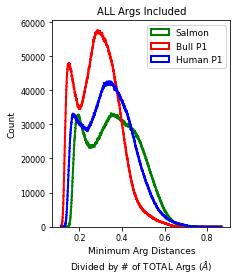

In [15]:
#plot histogram
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_minimum_values/len(salmon_arginines),
         bins=np.arange(np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).min(),
np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).max(),0.001),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=False,
         linewidth=2)
plt.hist(bull_minimum_values/len(bull_arginines),
         bins=np.arange(np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).min(),
np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).max(),0.001),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=False,
         linewidth=2)
plt.hist(p1_minimum_values/len(p1_arginines),
         bins=np.arange(np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).min(),
np.concatenate([p1_minimum_values/len(p1_arginines),
         salmon_minimum_values/len(salmon_arginines),
                bull_minimum_values/len(bull_arginines)]).max(),0.001),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=False,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("ALL Args Included",fontsize=10)
plt.ylabel('Count',fontsize=9)
plt.xlabel('Minimum Arg Distances\nDivided by # of TOTAL Args ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

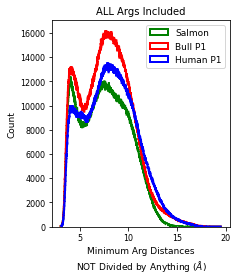

In [41]:
#plot histogram
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_minimum_values,
         bins=np.arange(np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).min(),
np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=False,
         linewidth=2)
plt.hist(bull_minimum_values,
         bins=np.arange(np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).min(),
np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=False,
         linewidth=2)
plt.hist(p1_minimum_values,
         bins=np.arange(np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).min(),
np.concatenate([p1_minimum_values,
         salmon_minimum_values,
                bull_minimum_values]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=False,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("ALL Args Included",fontsize=10)
plt.ylabel('Count',fontsize=9)
plt.xlabel('Minimum Arg Distances\nNOT Divided by Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# Separate SINGLE and CLUSTERED arginines

# part a

In [17]:
#IDENTIFY arginines that are single arginines or clusters (>2) using my function

salmon_singles  = [index+1 for index,element in enumerate(count_arg_blocks(salmon_sequence)) if element==1]
salmon_clusters = [index+1 for index,element in enumerate(count_arg_blocks(salmon_sequence)) if element>2]
bull_singles    = [index+1 for index,element in enumerate(count_arg_blocks(bull_sequence)) if element==1]
bull_clusters   = [index+1 for index,element in enumerate(count_arg_blocks(bull_sequence)) if element>2]
p1_singles      = [index+1 for index,element in enumerate(count_arg_blocks(p1_sequence)) if element==1]
p1_clusters     = [index+1 for index,element in enumerate(count_arg_blocks(p1_sequence)) if element>2]

In [18]:
#filter out dataframes such that single distances and cluster distances are separate
salmon_single_df=[]
salmon_cluster_df=[]
for df in salmon_dataframes:
    salmon_column_check=[]
    for column in df.columns:
        salmon_column_check.append(int(column.split(':')[1]))
    if sum(salmon_column_check)!=salmon_column_check[0]*len(salmon_column_check):
        print('Error!')
        break
    else:
        if salmon_column_check[0] in salmon_singles:
            salmon_single_df.append(df)
        elif salmon_column_check[0] in salmon_clusters:
            salmon_cluster_df.append(df)
        del salmon_column_check
bull_single_df=[]
bull_cluster_df=[]
for df in bull_dataframes:
    bull_column_check=[]
    for column in df.columns:
        bull_column_check.append(int(column.split(':')[1]))
    if sum(bull_column_check)!=bull_column_check[0]*len(bull_column_check):
        print('Error!')
        break
    else:
        if bull_column_check[0] in bull_singles:
            bull_single_df.append(df)
        elif bull_column_check[0] in bull_clusters:
            bull_cluster_df.append(df)
        del bull_column_check
p1_single_df=[]
p1_cluster_df=[]
for df in p1_dataframes:
    p1_column_check=[]
    for column in df.columns:
        p1_column_check.append(int(column.split(':')[1]))
    if sum(p1_column_check)!=p1_column_check[0]*len(p1_column_check):
        print('Error!')
        break
    else:
        if p1_column_check[0] in p1_singles:
            p1_single_df.append(df)
        elif p1_column_check[0] in p1_clusters:
            p1_cluster_df.append(df)
        del p1_column_check

In [19]:
j=0
salmon_intracluster_df=[]
for df in salmon_dataframes:
    salmon_intracluster_df.append(df.copy())
for df in salmon_intracluster_df:
    for column in df.columns:
        first= int(column.split(':')[1])
        second=int(column.split(':')[2])
        if (first not in salmon_clusters) or (second not in salmon_clusters):
            df.drop(column,axis=1,inplace=True)
salmon_intracluster_temp=[]
for df in salmon_intracluster_df:
    if df.empty!=True:
        salmon_intracluster_temp.append(df.copy())
salmon_intracluster_df=salmon_intracluster_temp.copy()
del salmon_intracluster_temp

j=0
bull_intracluster_df=[]
for df in bull_dataframes:
    bull_intracluster_df.append(df.copy())

for df in bull_intracluster_df:
    for column in df.columns:
        first= int(column.split(':')[1])
        second=int(column.split(':')[2])
        if (first not in bull_clusters) or (second not in bull_clusters):
            df.drop(column,axis=1,inplace=True)

bull_intracluster_temp=[]
for df in bull_intracluster_df:
    if df.empty!=True:
        bull_intracluster_temp.append(df.copy())
bull_intracluster_df=bull_intracluster_temp.copy()
del bull_intracluster_temp


j=0
p1_intracluster_df=[]
for df in p1_dataframes:
    p1_intracluster_df.append(df.copy())

for df in p1_intracluster_df:
    for column in df.columns:
        first= int(column.split(':')[1])
        second=int(column.split(':')[2])
        if (first not in p1_clusters) or (second not in p1_clusters):
            df.drop(column,axis=1,inplace=True)

p1_intracluster_temp=[]
for df in p1_intracluster_df:
    if df.empty!=True:
        p1_intracluster_temp.append(df.copy())
p1_intracluster_df=p1_intracluster_temp.copy()
del p1_intracluster_temp

In [20]:
k=0
for df in salmon_intracluster_df:
    if k==0:
        salmon_intracluster_minimum_values=df.min(axis=1).values
    elif k>0:
        salmon_intracluster_minimum_values=np.concatenate([salmon_intracluster_minimum_values,df.min(axis=1).values])
    k+=1
    
k=0
for df in bull_intracluster_df:
    if k==0:
        bull_intracluster_minimum_values=df.min(axis=1).values
    elif k>0:
        bull_intracluster_minimum_values=np.concatenate([bull_intracluster_minimum_values,df.min(axis=1).values])
    k+=1
    
k=0
for df in p1_intracluster_df:
    if k==0:
        p1_intracluster_minimum_values=df.min(axis=1).values
    elif k>0:
        p1_intracluster_minimum_values=np.concatenate([p1_intracluster_minimum_values,df.min(axis=1).values])
    k+=1

In [26]:
for df in salmon_intracluster_df:
    print(df.min(axis=1),df.idxmin(axis=1))

60000      12.121436
60001      12.715773
60002      13.173927
60003      11.411780
60004      11.925207
             ...    
1532516    11.205579
1532517    11.810775
1532518    11.990489
1532519    11.088295
1532520    10.274408
Length: 520000, dtype: float64 60000      :3:6
60001      :3:4
60002      :3:4
60003      :3:6
60004      :3:4
           ... 
1532516    :3:4
1532517    :3:4
1532518    :3:4
1532519    :3:4
1532520    :3:4
Length: 520000, dtype: object
60000      11.473127
60001      11.325498
60002      11.295862
60003      10.650397
60004      10.130610
             ...    
1532516    11.147424
1532517    11.810775
1532518    11.543889
1532519    10.572867
1532520    10.274408
Length: 520000, dtype: float64 60000      :4:6
60001      :4:6
60002      :4:6
60003      :4:6
60004      :4:6
           ... 
1532516    :4:5
1532517    :4:3
1532518    :4:5
1532519    :4:5
1532520    :4:3
Length: 520000, dtype: object
60000      10.936924
60001       9.682698
60002      10.099240
6

60000      10.311005
60001       9.606955
60002       8.588331
60003       8.616494
60004       8.388218
             ...    
1532516     6.304300
1532517     7.262950
1532518     6.503301
1532519     6.670282
1532520     6.515909
Length: 520000, dtype: float64 60000      :33:32
60001      :33:32
60002      :33:32
60003      :33:32
60004      :33:32
            ...  
1532516    :33:30
1532517    :33:30
1532518    :33:30
1532519    :33:30
1532520    :33:30
Length: 520000, dtype: object


In [42]:
salmon_arg_dist[salmon_arg_dist.sim==1]

,frames,sim,:3:4,:3:5,:3:6,:3:10,:3:13,:3:14,:3:15,:3:16,...,:33:17,:33:16,:33:15,:33:14,:33:13,:33:10,:33:6,:33:5,:33:4,:33:3
70000,70001,1,12.641150,5.773895,11.407286,16.469305,24.304745,21.746062,13.982590,17.491650,...,19.961162,8.994631,18.476501,6.778015,13.482612,19.435584,31.320561,20.430930,28.705037,22.811286
70001,70002,1,12.538698,7.505746,11.862073,17.980959,24.895986,22.214744,15.049841,17.148199,...,20.225129,9.400723,18.466562,7.246187,12.519647,17.383564,30.374238,18.878167,28.148043,22.765277
70002,70003,1,11.777778,6.258039,11.194755,16.842937,24.698966,20.813821,13.404656,16.484120,...,19.760447,9.344592,18.394189,7.121505,14.486214,17.282835,29.399292,17.664738,26.970070,21.456432
70003,70004,1,11.816744,5.892262,11.244084,14.680589,23.416328,20.280510,13.380053,16.219435,...,20.620853,9.099584,18.777044,7.099753,13.960936,17.448652,29.774590,17.031959,25.756361,20.789158
70004,70005,1,12.068774,6.232624,11.288745,15.788349,23.297470,20.235331,13.137731,15.969841,...,20.607017,9.572971,18.892536,7.706470,14.824461,18.132580,29.815372,17.509768,26.989731,20.836624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,1,12.711787,15.835668,9.509530,29.770976,34.972345,38.308446,38.469938,45.272474,...,36.606359,41.715538,42.461423,51.322463,53.963892,54.706815,73.826032,63.582718,72.859117,79.294664
99996,99997,1,12.977696,15.865776,10.305298,28.923787,34.798365,37.809432,38.320973,45.551870,...,37.598596,42.047518,42.318041,51.460169,54.002313,56.190019,73.456411,63.439147,72.054692,79.185586
99997,99998,1,11.582414,15.537101,8.978151,27.495720,33.067077,36.200289,36.863575,42.998377,...,36.239966,42.767907,42.096436,50.526261,52.952744,54.800438,73.443407,62.345498,70.997092,77.633288
99998,99999,1,11.793939,16.229406,9.076345,28.635651,34.154045,38.050830,37.144264,43.881456,...,36.647700,43.469479,43.543448,51.596266,53.152237,55.123341,74.784871,63.090408,71.941869,79.091934


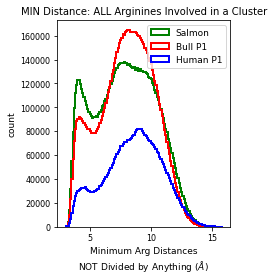

In [21]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_intracluster_minimum_values,
         bins=np.arange(np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).min(),
np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).max(),0.1),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=False,
         linewidth=2)
plt.hist(bull_intracluster_minimum_values,
         bins=np.arange(np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).min(),
np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).max(),0.1),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=False,
         linewidth=2)
plt.hist(p1_intracluster_minimum_values,
         bins=np.arange(np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).min(),
np.concatenate([p1_intracluster_minimum_values,
         salmon_intracluster_minimum_values,
                bull_intracluster_minimum_values]).max(),0.1),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=False,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("MIN Distance: ALL Arginines Involved in a Cluster",fontsize=10)
plt.ylabel('count',fontsize=9)
plt.xlabel('Minimum Arg Distances\nNOT Divided by Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

In [75]:
salmon_clusters_intra=[]
j=0
for element in salmon_clusters:
    if j==0:
        salmon_clusters_intra.append([element])
    elif salmon_clusters[j]-salmon_clusters[j-1]==1:
        salmon_clusters_intra[len(salmon_clusters_intra)-1].append(element)
    elif salmon_clusters[j]-salmon_clusters[j-1]>1:
        salmon_clusters_intra.append([element])   
    j+=1
bull_clusters_intra=[]
j=0
for element in bull_clusters:
    if j==0:
        bull_clusters_intra.append([element])
    elif bull_clusters[j]-bull_clusters[j-1]==1:
        bull_clusters_intra[len(bull_clusters_intra)-1].append(element)
    elif bull_clusters[j]-bull_clusters[j-1]>1:
        bull_clusters_intra.append([element])   
    j+=1
p1_clusters_intra=[]
j=0
for element in p1_clusters:
    if j==0:
        p1_clusters_intra.append([element])
    elif p1_clusters[j]-p1_clusters[j-1]==1:
        p1_clusters_intra[len(p1_clusters_intra)-1].append(element)
    elif p1_clusters[j]-p1_clusters[j-1]>1:
        p1_clusters_intra.append([element])   
    j+=1

In [128]:
salmon_intracluster_df_intra=salmon_arg_dist.copy()
salmon_intracluster_df_intra_columns=[]
for cluster in salmon_clusters_intra:
    for column in salmon_intracluster_df_intra.columns:
        if column!='frames' and column!='sim':
            first=int(column.split(':')[1])
            second=int(column.split(':')[2])
            if (first in cluster) and (second in cluster):
                salmon_intracluster_df_intra_columns.append(column)
salmon_intracluster_df_intra=salmon_intracluster_df_intra[salmon_intracluster_df_intra_columns].copy()

bull_intracluster_df_intra=bull_arg_dist.copy()
bull_intracluster_df_intra_columns=[]
for cluster in bull_clusters_intra:
    for column in bull_intracluster_df_intra.columns:
        if column!='frames' and column!='sim':
            first=int(column.split(':')[1])
            second=int(column.split(':')[2])
            if (first in cluster) and (second in cluster):
                bull_intracluster_df_intra_columns.append(column)
bull_intracluster_df_intra=bull_intracluster_df_intra[bull_intracluster_df_intra_columns].copy()

p1_intracluster_df_intra=p1_arg_dist.copy()
p1_intracluster_df_intra_columns=[]
for cluster in p1_clusters_intra:
    for column in p1_intracluster_df_intra.columns:
        if column!='frames' and column!='sim':
            first=int(column.split(':')[1])
            second=int(column.split(':')[2])
            if (first in cluster) and (second in cluster):
                p1_intracluster_df_intra_columns.append(column)
p1_intracluster_df_intra=p1_intracluster_df_intra[p1_intracluster_df_intra_columns].copy()

In [146]:
salmon_intracluster_intra_maximum_values=salmon_intracluster_df_intra.max(axis=1)
bull_intracluster_intra_maximum_values=bull_intracluster_df_intra.max(axis=1)
p1_intracluster_intra_maximum_values=p1_intracluster_df_intra.max(axis=1)

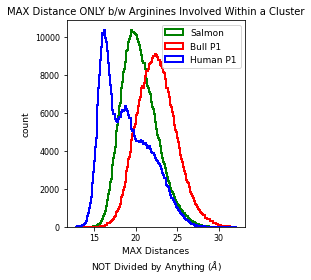

In [147]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_intracluster_intra_maximum_values,
         bins=np.arange(np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).min(),
np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).max(),0.1),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=False,
         linewidth=2)
plt.hist(bull_intracluster_intra_maximum_values,
         bins=np.arange(np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).min(),
np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).max(),0.1),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=False,
         linewidth=2)
plt.hist(p1_intracluster_intra_maximum_values,
         bins=np.arange(np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).min(),
np.concatenate([p1_intracluster_intra_maximum_values,
         salmon_intracluster_intra_maximum_values,
                bull_intracluster_intra_maximum_values]).max(),0.1),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=False,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("MAX Distance ONLY b/w Arginines Involved Within a Cluster",fontsize=10)
plt.ylabel('count',fontsize=9)
plt.xlabel('MAX Distances\nNOT Divided by Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# part b

In [41]:
#get row-by-row minimum values for salmon singles and clusters
k=0
for df in salmon_single_df:
    if k==0:
        salmon_single_minimum_values=df.min(axis=1).values
    elif k>0:
        salmon_single_minimum_values=np.concatenate([salmon_single_minimum_values,df.min(axis=1).values])
    k+=1
k=0
for df in salmon_cluster_df:
    if k==0:
        salmon_cluster_minimum_values=df.min(axis=1).values
    elif k>0:
        salmon_cluster_minimum_values=np.concatenate([salmon_cluster_minimum_values,df.min(axis=1).values])
    k+=1
#get row-by-row minimum values for bull singles and clusters
k=0
for df in bull_single_df:
    if k==0:
        bull_single_minimum_values=df.min(axis=1).values
    elif k>0:
        bull_single_minimum_values=np.concatenate([bull_single_minimum_values,df.min(axis=1).values])
    k+=1
k=0
for df in bull_cluster_df:
    if k==0:
        bull_cluster_minimum_values=df.min(axis=1).values
    elif k>0:
        bull_cluster_minimum_values=np.concatenate([bull_cluster_minimum_values,df.min(axis=1).values])
    k+=1
#get row-by-row minimum values for human p1 singles and clusters
k=0
for df in p1_single_df:
    if k==0:
        p1_single_minimum_values=df.min(axis=1).values
    elif k>0:
        p1_single_minimum_values=np.concatenate([p1_single_minimum_values,df.min(axis=1).values])
    k+=1
k=0
for df in p1_cluster_df:
    if k==0:
        p1_cluster_minimum_values=df.min(axis=1).values
    elif k>0:
        p1_cluster_minimum_values=np.concatenate([p1_cluster_minimum_values,df.min(axis=1).values])
    k+=1

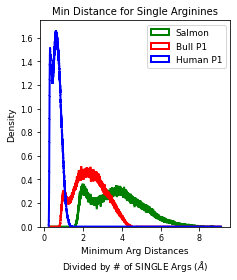

In [44]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_single_minimum_values/len(salmon_singles),
         bins=np.arange(np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).min(),
np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).max(),0.001),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_single_minimum_values/len(bull_singles),
         bins=np.arange(np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).min(),
np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).max(),0.001),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_single_minimum_values/len(p1_singles),
         bins=np.arange(np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).min(),
np.concatenate([p1_single_minimum_values/len(p1_singles),
         salmon_single_minimum_values/len(salmon_singles),
                bull_single_minimum_values/len(bull_singles)]).max(),0.001),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Min Distance for Single Arginines",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Minimum Arg Distances\nDivided by # of SINGLE Args ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

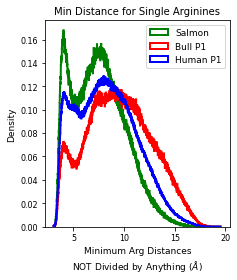

In [51]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_single_minimum_values,
         bins=np.arange(np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).min(),
np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_single_minimum_values,
         bins=np.arange(np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).min(),
np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_single_minimum_values,
         bins=np.arange(np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).min(),
np.concatenate([p1_single_minimum_values,
         salmon_single_minimum_values,
                bull_single_minimum_values]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Min Distance for Single Arginines",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Minimum Arg Distances\nNOT Divided by Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

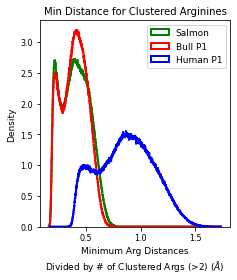

In [56]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_cluster_minimum_values/len(salmon_clusters),
         bins=np.arange(np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).min(),
np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).max(),0.001),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_cluster_minimum_values/len(bull_clusters),
         bins=np.arange(np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).min(),
np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).max(),0.001),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_cluster_minimum_values/len(p1_clusters),
         bins=np.arange(np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).min(),
np.concatenate([p1_cluster_minimum_values/len(p1_clusters),
         salmon_cluster_minimum_values/len(salmon_clusters),
                bull_cluster_minimum_values/len(bull_clusters)]).max(),0.001),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Min Distance for Clustered Arginines",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Minimum Arg Distances\nDivided by # of Clustered Args (>2) ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

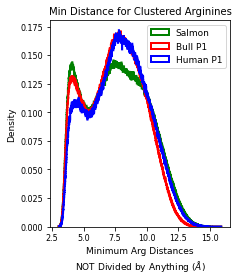

In [49]:
#plot histogram for SINGLE
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_cluster_minimum_values,
         bins=np.arange(np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).min(),
np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_cluster_minimum_values,
         bins=np.arange(np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).min(),
np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_cluster_minimum_values,
         bins=np.arange(np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).min(),
np.concatenate([p1_cluster_minimum_values,
         salmon_cluster_minimum_values,
                bull_cluster_minimum_values]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Min Distance for Clustered Arginines",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Minimum Arg Distances\nNOT Divided by Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

# previous work, do not see below here

In [89]:
#identify 'minimum pairs'
#for arginine#3 arginine#4 is closest to it, so :3:4 is in this list
#for arginine$4 arginine#5 is closest to it, so :4:5 is in this list
#ALL are unique pairs. That is, :3:4 and :4:3 are NOT both included.

#below code for salmon
j=0
first_init=[]
salmon_min_pairs=[]
for residue_pair in salmon_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        salmon_min_pairs.append(residue_pair)
    elif j>0:
        if first_init[j]==first_init[j-1]:
            a=0#this is a dummy statement
        elif first_init[j]>first_init[j-1]:
            salmon_min_pairs.append(residue_pair)
        else:
            print('error!')
            
    j=j+1
#below code for human P1
j=0
first_init=[]
p1_min_pairs=[]
for residue_pair in p1_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        p1_min_pairs.append(residue_pair)
    elif j>0:
        if first_init[j]==first_init[j-1]:
            a=0#this is a dummy statement
        elif first_init[j]>first_init[j-1]:
            p1_min_pairs.append(residue_pair)
        else:
            print('error!')
            
    j=j+1
#below code for bull
j=0
first_init=[]
bull_min_pairs=[]
for residue_pair in bull_arg_dist.iloc[:,2:].columns:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    first_init.append(first)
    if j==0:
        bull_min_pairs.append(residue_pair)
    elif j>0:
        if first_init[j]==first_init[j-1]:
            a=0
        elif first_init[j]>first_init[j-1]:
            bull_min_pairs.append(residue_pair)
        else:
            print('error!')
            
    j=j+1
print('All the salmon pairs:')    
print(salmon_min_pairs)
print('All the bull pairs:')    
print(bull_min_pairs)
print('All the human P1 pairs:')    
print(p1_min_pairs)




All the salmon pairs:
[':3:4', ':4:5', ':5:6', ':6:10', ':10:13', ':13:14', ':14:15', ':15:16', ':16:17', ':17:19', ':19:22', ':22:23', ':23:24', ':24:25', ':25:26', ':26:27', ':27:30', ':30:31', ':31:32', ':32:33']
All the bull pairs:
[':2:4', ':4:13', ':13:15', ':15:16', ':16:17', ':17:18', ':18:19', ':19:20', ':20:21', ':21:23', ':23:24', ':24:25', ':25:26', ':26:27', ':27:28', ':28:31', ':31:32', ':32:33', ':33:34', ':34:35', ':35:36', ':36:40', ':40:41', ':41:46', ':46:48', ':48:49']
All the human P1 pairs:
[':2:4', ':4:7', ':7:11', ':11:13', ':13:16', ':16:18', ':18:20', ':20:22', ':22:23', ':23:24', ':24:25', ':25:26', ':26:27', ':27:32', ':32:33', ':33:34', ':34:37', ':37:40', ':40:42', ':42:44', ':44:46', ':46:48', ':48:49']


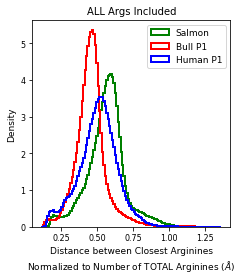

In [119]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("ALL Args Included",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNormalized to Number of TOTAL Arginines ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

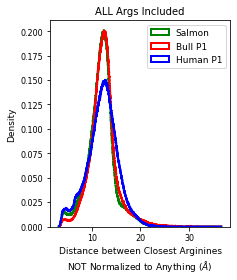

In [127]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_min_pairs].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_min_pairs].to_numpy().flatten(),
         salmon_arg_dist[salmon_min_pairs].to_numpy().flatten(),
                bull_arg_dist[bull_min_pairs].to_numpy().flatten()]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("ALL Args Included",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNOT Normalized to Anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

In [147]:
salmon_temp=salmon_min_pairs.copy()
salmon_singles=[]
salmon_clusters=[]
for residue_pair in salmon_temp:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    if abs(second-first)!=1:
        salmon_singles.append(residue_pair)
    else:
        salmon_clusters.append(residue_pair)

#MANUALLY REMOVING SOME PAIRS IN SALMON LIST WILL FIX CODE LATER       
salmon_singles.remove(':27:30')  

print('The salmon singles:')
print(salmon_singles)
print('The salmon clusters:')
print(salmon_clusters)

bull_temp=bull_min_pairs.copy()
bull_singles=[]
bull_clusters=[]
for residue_pair in bull_temp:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    if abs(second-first)!=1:
        bull_singles.append(residue_pair)
    else:
        bull_clusters.append(residue_pair)

#MANUALLY REMOVING SOME PAIRS IN bull LIST WILL FIX CODE LATER       
bull_singles.remove(':21:23') 
bull_singles.remove(':28:31')
bull_singles.remove(':36:40')  
bull_clusters.remove(':40:41')
bull_clusters.remove(':48:49')
 
print('The bull singles:')
print(bull_singles)
print('The bull clusters:')
print(bull_clusters)
p1_temp=p1_min_pairs.copy()
p1_singles=[]
p1_clusters=[]
for residue_pair in p1_temp:
    first=int(residue_pair.split(':')[1])
    second=int(residue_pair.split(':')[2])
    if abs(second-first)!=1:
        p1_singles.append(residue_pair)
    else:
        p1_clusters.append(residue_pair)
#MANUALLY REMOVING SOME PAIRS IN human P1 LIST WILL FIX CODE LATER
p1_singles.remove(':27:32') 
p1_clusters.remove(':48:49') 

print('The human P1 singles:')
print(p1_singles)
print('The human P1 clusters:')
print(p1_clusters)

The salmon singles:
[':6:10', ':10:13', ':17:19', ':19:22']
The salmon clusters:
[':3:4', ':4:5', ':5:6', ':13:14', ':14:15', ':15:16', ':16:17', ':22:23', ':23:24', ':24:25', ':25:26', ':26:27', ':30:31', ':31:32', ':32:33']
The bull singles:
[':2:4', ':4:13', ':13:15', ':41:46', ':46:48']
The bull clusters:
[':15:16', ':16:17', ':17:18', ':18:19', ':19:20', ':20:21', ':23:24', ':24:25', ':25:26', ':26:27', ':27:28', ':31:32', ':32:33', ':33:34', ':34:35', ':35:36']
The human P1 singles:
[':2:4', ':4:7', ':7:11', ':11:13', ':13:16', ':16:18', ':18:20', ':20:22', ':34:37', ':37:40', ':40:42', ':42:44', ':44:46', ':46:48']
The human P1 clusters:
[':22:23', ':23:24', ':24:25', ':25:26', ':26:27', ':32:33', ':33:34']


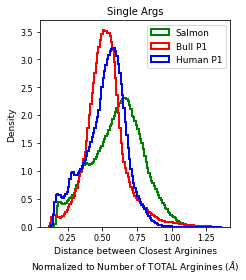

In [148]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_singles].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Single Args",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNormalized to Number of TOTAL Arginines ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

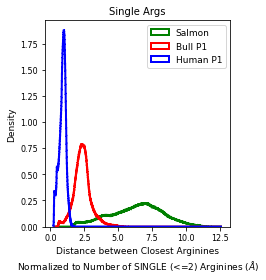

In [149]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_singles].to_numpy().flatten()/6,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten()/14,
         salmon_arg_dist[salmon_singles].to_numpy().flatten()/2,
                bull_arg_dist[bull_singles].to_numpy().flatten()/6]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Single Args",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNormalized to Number of SINGLE (<=2) Arginines ('+r'$\AA$'+')',
           fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

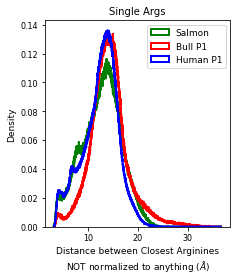

In [150]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_singles].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_singles].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_singles].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_singles].to_numpy().flatten(),
         salmon_arg_dist[salmon_singles].to_numpy().flatten(),
                bull_arg_dist[bull_singles].to_numpy().flatten()]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Single Args",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNOT normalized to anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

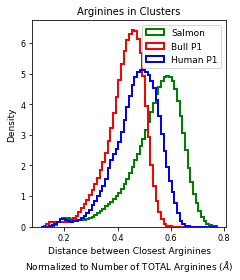

In [151]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/len(p1_arginines),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/len(salmon_arginines),
                bull_arg_dist[bull_clusters].to_numpy().flatten()/len(bull_arginines)]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Arginines in Clusters",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNormalized to Number of TOTAL Arginines ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

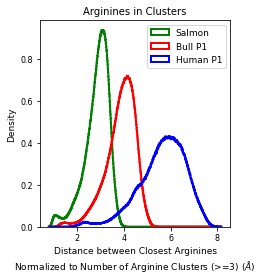

In [152]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_clusters].to_numpy().flatten()/3,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten()/2,
         salmon_arg_dist[salmon_clusters].to_numpy().flatten()/4,
                bull_arg_dist[bull_clusters].to_numpy().flatten()/3]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9)
plt.title("Arginines in Clusters",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\nNormalized to Number of Arginine Clusters (>=3) ('+r'$\AA$'+')',
           fontsize=9)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()

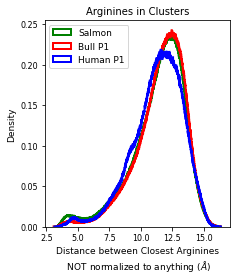

In [153]:
fig = plt.subplots(figsize=(3.4,4))

plt.hist(salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).max(),0.01),
         label='Salmon',
         histtype='step',
         linestyle=('solid'),
         color='green',
         density=True,
         linewidth=2)
plt.hist(bull_arg_dist[bull_clusters].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).max(),0.01),
         label='Bull P1',
         histtype='step',
         linestyle=('solid'),
         color='red',
         density=True,
         linewidth=2)
plt.hist(p1_arg_dist[p1_clusters].to_numpy().flatten(),
         bins=np.arange(np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).min(),
np.concatenate([p1_arg_dist[p1_clusters].to_numpy().flatten(),
         salmon_arg_dist[salmon_clusters].to_numpy().flatten(),
                bull_arg_dist[bull_clusters].to_numpy().flatten()]).max(),0.01),
         label='Human P1',
         histtype='step',
         linestyle=('solid'),
         color='blue',
         density=True,
         linewidth=2)
plt.legend(fontsize=9,loc='upper left')
plt.title("Arginines in Clusters",fontsize=10)
plt.ylabel('Density',fontsize=9)
plt.xlabel('Distance between Closest Arginines\n NOT normalized to anything ('+r'$\AA$'+')',fontsize=9)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()